# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from reverse_rsi_crossover import ReverseRSICrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130131,
 'strategyId': '6bb96935b6884566bc4a4d0618564af9'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NFLX', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:NFLX'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIME_PERIOD': 10,
  'OVERBOUGHT_VALUE': 65,
    'OVERSOLD_VALUE': 35
}

In [12]:
initial_virtual_funds = 6000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:NFLX', 
    lots=4,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'Reverse RSI US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                             │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                                                          │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Strategy Name           │ Reverse RSI US                                                    │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:NFLX']                              

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

In [16]:
print(logs)

[2023-08-22 17:24:52] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 17:24:52] Sanity checks on cfg successful.
[2023-08-22 17:24:52] Currency set to "USD"
[2023-08-22 17:24:52] Setting up broker connection...
[2023-08-22 17:24:55] Broker connection has been setup successfully.
[2023-08-22 17:24:55] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '6000.00'
[2023-08-22 17:24:55] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 17:24:55] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 17:24:55] Reading strategy...
[2023-08-22 17:24:55] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,NFLX,2021-08-03 12:30:00-04:00,BUY,4,$,511.87,2021-08-03 15:30:00-04:00,SELL,4,$,511.87,0.00,0.00
1,NASDAQ,NFLX,2021-08-06 12:30:00-04:00,SELL,4,$,523.32,2021-08-06 15:30:00-04:00,BUY,4,$,523.32,0.00,0.00
2,NASDAQ,NFLX,2021-08-11 09:30:00-04:00,BUY,4,$,516.77,2021-08-11 11:30:00-04:00,SELL,4,$,513.13,-14.56,-14.56
3,NASDAQ,NFLX,2021-08-13 09:30:00-04:00,BUY,4,$,512.64,2021-08-13 15:30:00-04:00,SELL,4,$,517.34,18.80,4.24
4,NASDAQ,NFLX,2021-08-18 09:30:00-04:00,SELL,4,$,520.00,2021-08-18 10:30:00-04:00,BUY,4,$,521.79,-7.16,-2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,NASDAQ,NFLX,2023-07-05 10:30:00-04:00,SELL,4,$,442.42,2023-07-05 15:30:00-04:00,BUY,4,$,442.43,-0.04,-248.48
160,NASDAQ,NFLX,2023-07-06 12:30:00-04:00,BUY,4,$,433.25,2023-07-06 15:30:00-04:00,SELL,4,$,433.25,0.00,-248.48
161,NASDAQ,NFLX,2023-07-11 11:30:00-04:00,BUY,4,$,437.11,2023-07-11 15:30:00-04:00,SELL,4,$,437.16,0.20,-248.28
162,NASDAQ,NFLX,2023-07-14 09:30:00-04:00,SELL,4,$,452.83,2023-07-14 15:30:00-04:00,BUY,4,$,447.02,23.24,-225.04


## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      80.0%

Cumulative Return   -3.29%
CAGR﹪              -1.68%

Sharpe              -1.16
Prob. Sharpe Ratio  18.14%
Sortino             -1.65
Sortino/√2          -1.17
Omega               0.79

Max Drawdown        -5.19%
Longest DD Days     525

Gain/Pain Ratio     -0.22
Gain/Pain (1M)      -0.39

Payoff Ratio        1.15
Profit Factor       0.79
Common Sense Ratio  0.74
CPC Index           0.37
Tail Ratio          0.93
Outlier Win Ratio   5.31
Outlier Loss Ratio  3.49

MTD                 1.21%
3M                  0.89%
6M                  -0.13%
YTD                 -0.65%
1Y                  -0.04%
3Y (ann.)           -1.68%
5Y (ann.)           -1.68%
10Y (ann.)          -1.68%
All-time (ann.)     -1.68%

Avg. Drawdown       -1.79%
Avg. Drawdown Days  176
Recovery Factor     -0.63
Ulcer Index         0.03
Serenity Index  

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             80.0%

Cumulative Return          -3.29%
CAGR﹪                     -1.68%

Sharpe                     -1.16
Prob. Sharpe Ratio         18.14%
Smart Sharpe               -1.15
Sortino                    -1.65
Smart Sortino              -1.64
Sortino/√2                 -1.17
Smart Sortino/√2           -1.16
Omega                      0.79

Max Drawdown               -5.19%
Longest DD Days            525
Volatility (ann.)          4.34%
Calmar                     -0.32
Skew                       0.67
Kurtosis                   5.74

Expected Daily %           -0.02%
Expected Monthly %         -0.14%
Expected Yearly %          -1.11%
Kelly Criterion            -10.73%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.47%
Expected Shortfall (cVaR)  -0.47%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-17,2023-06-02,2023-07-28,525,-5.193072,-4.912276
2,2021-08-27,2021-12-06,2022-02-14,170,-1.590852,-1.474367
3,2021-08-11,2021-08-11,2021-08-13,2,-0.242667,0.000000
4,2021-08-18,2021-08-18,2021-08-25,7,-0.119249,0.000000


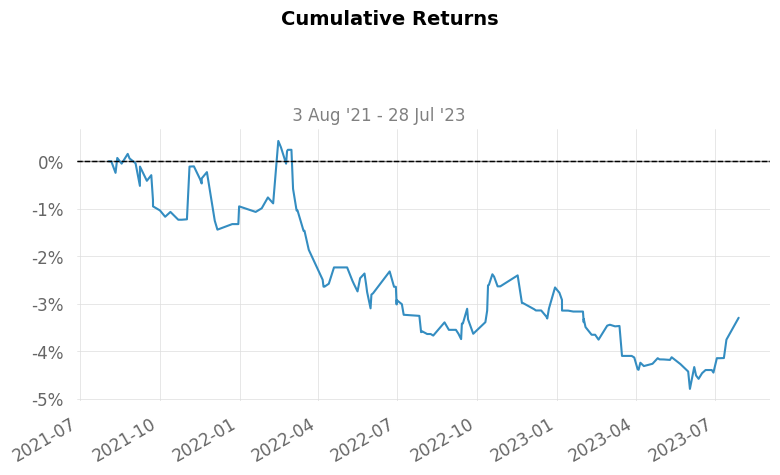

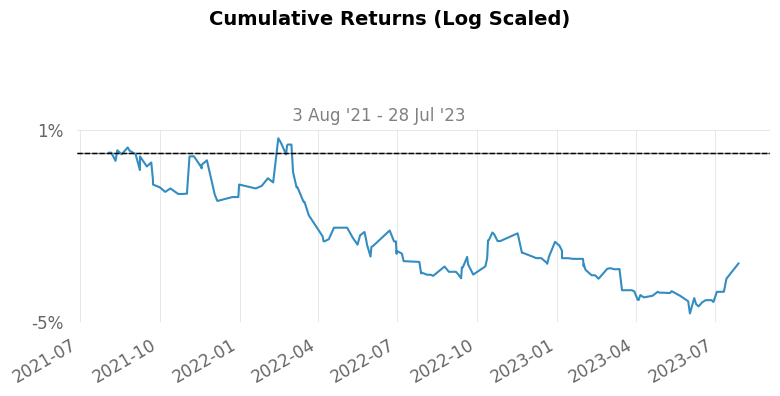

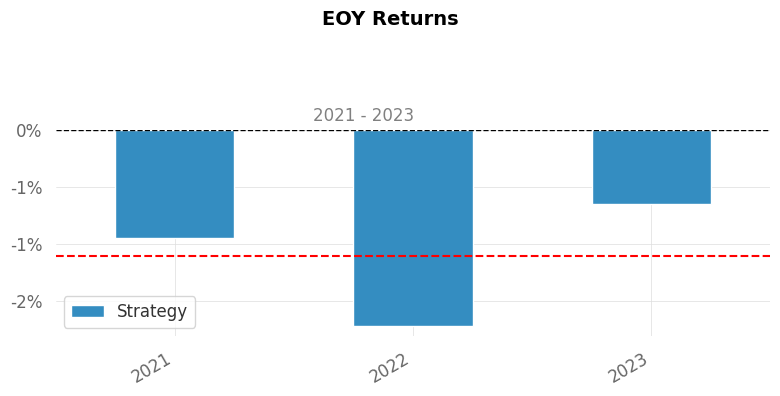

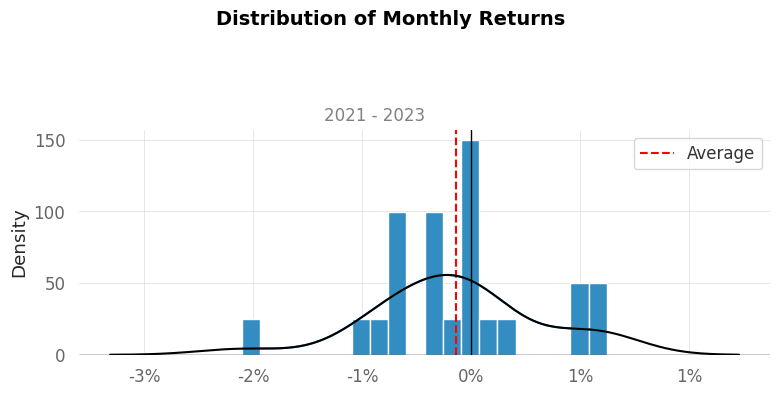

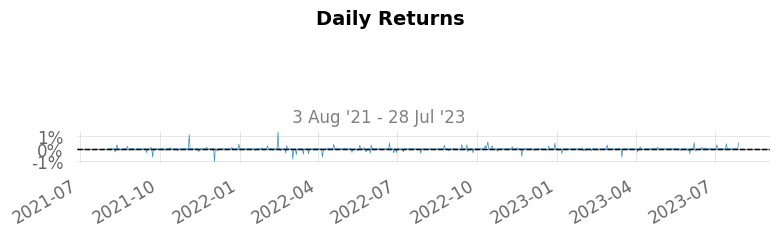

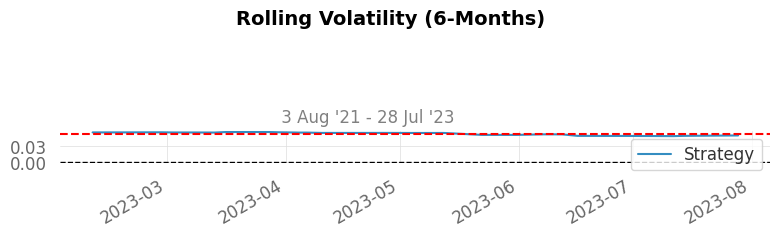

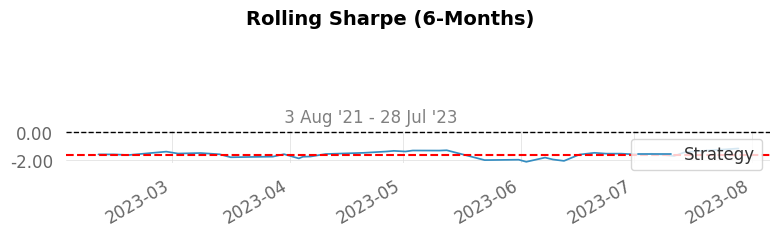

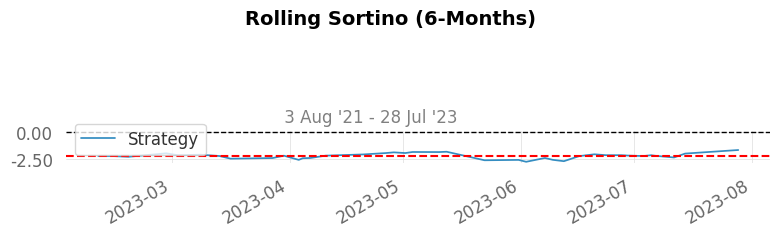

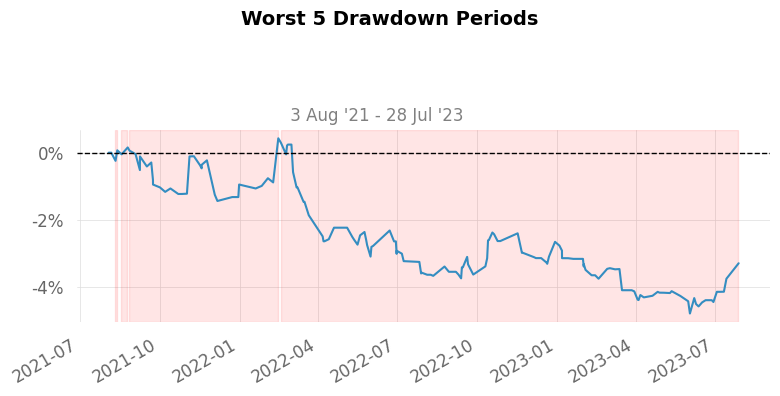

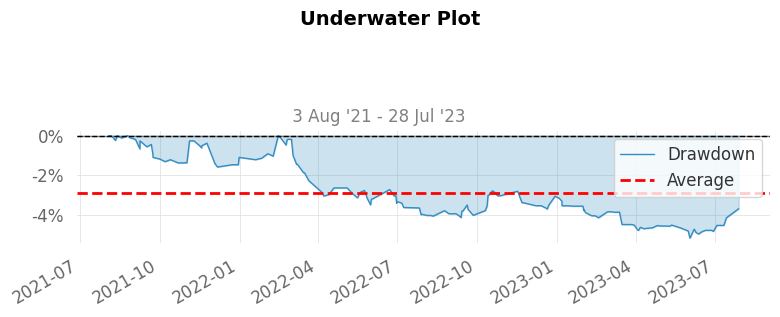

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


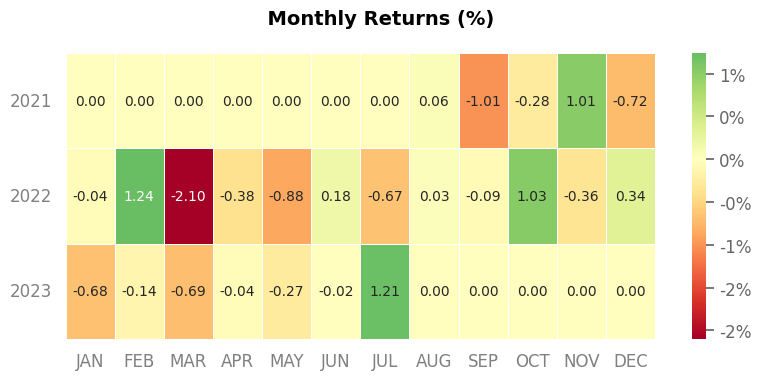

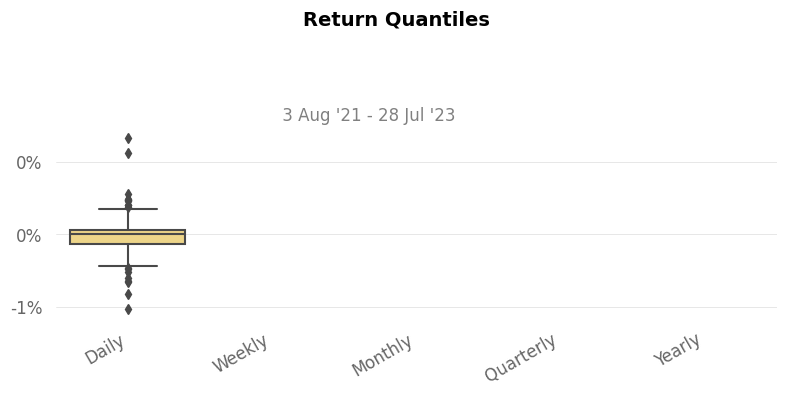

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:NFLX | 2021-08-03 12:30:00-04:00 | e8f8fe49d95a4f34bd108d90c2e00694 | BUY  |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2021-08-03 12:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-03 12:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2021-08-03 12:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2021-08-03 12:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2021-08-03 12:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NFLX', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [22]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NFLX', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'Reverse RSI US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Config          │ Value                                                             │
╞═════════════════╪═══════════════════════════════════════════════════════════════════╡
│ Vendor Name     │ ALPACAV2                                                          │
├─────────────────┼───────────────────────────────────────────────────────────────────┤
│ Broker Name     │ ALPACAV2                                                          │
├─────────────────┼───────────────────────────────────────────────────────────────────┤
│ Strategy Name   │ Reverse RSI US                                                    │
├─────────────────┼───────────────────────────────────────────────────────────────────┤
│ Trading Type    │ REALTRADING                                                       │
├─────────────────┼──────────────────────────────────────

### Status

In [23]:
connection.get_realtrading_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)